This script generates plots for fig. 2c in the paper

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from statannot import add_stat_annotation
sns.set(font_scale = 1.5)
sns.set_style('white')

Read test results from previous steps

In [5]:
table_hlca = pd.read_csv("results/eval/performances_HLCA_loo_polyEN.csv")
table_hlca_baseline = pd.read_csv("results/eval/performances_HLCA_loo_baselineLR.csv")
table_hlca_fleischer = pd.read_csv("results/eval/performances_HLCA_loo_fleischer.csv")
table_hlca_raptor = pd.read_csv("results/eval/performances_HLCA_loo_RAPToR.csv")

table_nuc = pd.read_csv("results/eval/performances_nucseq_loo_polyEN.csv")
table_nuc_baseline = pd.read_csv("results/eval/performances_nucseq_loo_baselineLR.csv")
table_nuc_fleischer = pd.read_csv("results/eval/performances_nucseq_loo_fleischer.csv")
table_nuc_raptor = pd.read_csv("results/eval/performances_nucseq_loo_RAPToR.csv")

table_cd = pd.read_csv("results/eval/performances_CD_polyEN.csv")
table_cd_baseline = pd.read_csv("results/eval/performances_CD_baselineLR.csv")
table_cd_fleischer = pd.read_csv("results/eval/performances_CD_fleischer.csv")
table_cd_raptor = pd.read_csv("results/eval/performances_CD_RAPToR.csv")

In [6]:
table_nuc["group"] = table_nuc["Group"]
table_nuc["cell_type"] = table_nuc["Cell type(Nuc-seq)"]

table_nuc_baseline["group"] = table_nuc_baseline["Group"]
table_nuc_baseline["cell_type"] = table_nuc_baseline["Cell type(Nuc-seq)"]

table_nuc_fleischer["group"] = table_nuc_fleischer["Group"]
table_nuc_fleischer["cell_type"] = table_nuc_fleischer["Cell type(Nuc-seq)"]

table_nuc_raptor["group"] = table_nuc_raptor["Group"]
table_nuc_raptor["cell_type"] = table_nuc_raptor["Cell type(Nuc-seq)"]

In [7]:
def split_groups(df):
    df_smoker = df.loc[df["group"] == "smoker"].copy()
    df_nonsmoker = df.loc[df["group"] == "nonsmoker"].copy()
    return df_smoker,df_nonsmoker

In [8]:
smoker_hlca,nonsmoker_hlca = split_groups(table_hlca)
smoker_hlca_baseline,nonsmoker_hlca_baseline = split_groups(table_hlca_baseline)
smoker_hlca_fleischer,nonsmoker_hlca_fleischer = split_groups(table_hlca_fleischer)
smoker_hlca_raptor,nonsmoker_hlca_raptor = split_groups(table_hlca_raptor)

smoker_nuc,nonsmoker_nuc = split_groups(table_nuc)
smoker_nuc_baseline,nonsmoker_nuc_baseline = split_groups(table_nuc_baseline)
smoker_nuc_fleischer,nonsmoker_nuc_fleischer = split_groups(table_nuc_fleischer)
smoker_nuc_raptor,nonsmoker_nuc_raptor = split_groups(table_nuc_raptor)

smoker_cd,nonsmoker_cd = split_groups(table_cd)
smoker_cd_baseline,nonsmoker_cd_baseline = split_groups(table_cd_baseline)
smoker_cd_fleischer,nonsmoker_cd_fleischer = split_groups(table_cd_fleischer)
smoker_cd_raptor,nonsmoker_cd_raptor = split_groups(table_cd_raptor)

In [9]:
def reformat(table):
    
    dfs = []
    n_rep = 5
    for i,(ct,df) in enumerate(table.groupby("cell_type")): # Iterate over each cell type
        
        ct_df_all = []
        for (gene_type,use_pca),dff in df.groupby(["gene_type","use_pca"]): # Iterate over gene_type and use_pca for within each cell type
            if dff.iloc[0,:]["pred_age"] is not np.nan:
                dff["R2_mean"] = dff["R2"].mean()
                ct_df_all.append(dff)
            
        if len(ct_df_all) != 0: # If no gene_type and use_pca contains valid predictions, the current cell type will be skipped.
            ct_df_all = pd.concat(ct_df_all)    
            ct_df_all.sort_values(by = "R2_mean",ascending = False,inplace=True)
            ct_df_all = ct_df_all.iloc[0:n_rep,] # pick the best one for each cell type
            ct_df_all["ind"] = str(i)
            dfs.append(ct_df_all)
        
    table = pd.concat(dfs)
    
    del(table["R2"],
        table["rep"],
        table["pred_age"],
        table["true_age"]
       )
    
    if "MAE" in table.columns:
        del(table["MAE"])
        
    table.drop_duplicates(inplace=True)
    table.sort_values(by = "R2_mean", ascending = False, inplace = True)
    
    return(table)

In [10]:
def keep_top_cts(table, n_top_ct = 20):
    ct_r2 = []
    for cell_type,df in table.groupby("cell_type"):
        best_r2 = max(df["R2_mean"])
        ct_r2.append([cell_type, best_r2])
    ct_r2.sort(key = lambda x:x[1], reverse = True)
    top_cts = [cell_type for cell_type,r2 in ct_r2[:n_top_ct]]
    
    return table.loc[table["cell_type"].isin(top_cts),].copy()

In [11]:
smoker_hlca_plt = reformat(smoker_hlca)
smoker_cd_plt = reformat(smoker_cd)
nonsmoker_hlca_plt = reformat(nonsmoker_hlca)
nonsmoker_nuc_plt = reformat(nonsmoker_nuc)
nonsmoker_cd_plt = reformat(nonsmoker_cd)

smoker_hlca_plt_baseline = reformat(smoker_hlca_baseline)
smoker_cd_plt_baseline = reformat(smoker_cd_baseline)
nonsmoker_hlca_plt_baseline = reformat(nonsmoker_hlca_baseline)
nonsmoker_nuc_plt_baseline = reformat(nonsmoker_nuc_baseline)
nonsmoker_cd_plt_baseline = reformat(nonsmoker_cd_baseline)

smoker_hlca_plt_fleischer = reformat(smoker_hlca_fleischer)
smoker_cd_plt_fleischer = reformat(smoker_cd_fleischer)
nonsmoker_hlca_plt_fleischer = reformat(nonsmoker_hlca_fleischer)
nonsmoker_nuc_plt_fleischer = reformat(nonsmoker_nuc_fleischer)
nonsmoker_cd_plt_fleischer = reformat(nonsmoker_cd_fleischer)

smoker_hlca_plt_raptor = reformat(smoker_hlca_raptor)
smoker_cd_plt_raptor = reformat(smoker_cd_raptor)
nonsmoker_hlca_plt_raptor = reformat(nonsmoker_hlca_raptor)
nonsmoker_nuc_plt_raptor = reformat(nonsmoker_nuc_raptor)
nonsmoker_cd_plt_raptor = reformat(nonsmoker_cd_raptor)


smoker_hlca_plt = keep_top_cts(smoker_hlca_plt, n_top_ct = 10)
smoker_cd_plt = keep_top_cts(smoker_cd_plt, n_top_ct = 10)
nonsmoker_hlca_plt = keep_top_cts(nonsmoker_hlca_plt, n_top_ct = 10)
nonsmoker_nuc_plt = keep_top_cts(nonsmoker_nuc_plt, n_top_ct = 10)
nonsmoker_cd_plt = keep_top_cts(nonsmoker_cd_plt, n_top_ct = 10)


smoker_hlca_plt_baseline = keep_top_cts(smoker_hlca_plt_baseline, n_top_ct = 10)
smoker_cd_plt_baseline = keep_top_cts(smoker_cd_plt_baseline, n_top_ct = 10)
nonsmoker_hlca_plt_baseline = keep_top_cts(nonsmoker_hlca_plt_baseline, n_top_ct = 10)
nonsmoker_nuc_plt_baseline = keep_top_cts(nonsmoker_nuc_plt_baseline, n_top_ct = 10)
nonsmoker_cd_plt_baseline = keep_top_cts(nonsmoker_cd_plt_baseline, n_top_ct = 10)


smoker_hlca_plt_fleischer = keep_top_cts(smoker_hlca_plt_fleischer, n_top_ct = 10)
smoker_cd_plt_fleischer = keep_top_cts(smoker_cd_plt_fleischer, n_top_ct = 10)
nonsmoker_hlca_plt_fleischer = keep_top_cts(nonsmoker_hlca_plt_fleischer, n_top_ct = 10)
nonsmoker_nuc_plt_fleischer = keep_top_cts(nonsmoker_nuc_plt_fleischer, n_top_ct = 10)
nonsmoker_cd_plt_v = keep_top_cts(nonsmoker_cd_plt_fleischer, n_top_ct = 10)

smoker_hlca_plt_raptor = keep_top_cts(smoker_hlca_plt_raptor, n_top_ct = 10)
smoker_cd_plt_raptor = keep_top_cts(smoker_cd_plt_raptor, n_top_ct = 10)
nonsmoker_hlca_plt_raptor = keep_top_cts(nonsmoker_hlca_plt_raptor, n_top_ct = 10)
nonsmoker_nuc_plt_raptor = keep_top_cts(nonsmoker_nuc_plt_raptor, n_top_ct = 10)
nonsmoker_cd_plt_raptor = keep_top_cts(nonsmoker_cd_plt_raptor, n_top_ct = 10)

Specify dataset group

In [12]:
smoker_hlca_plt["group"] = "HLCA"
smoker_cd_plt["group"] = "Cross-dataset"
smoker_hlca_plt_baseline["group"] = "HLCA"
smoker_cd_plt_baseline["group"] = "Cross-dataset"
smoker_hlca_plt_fleischer["group"] = "HLCA"
smoker_cd_plt_fleischer["group"] = "Cross-dataset"
smoker_hlca_plt_raptor["group"] = "HLCA"
smoker_cd_plt_raptor["group"] = "Cross-dataset"

nonsmoker_hlca_plt["group"] = "HLCA"
nonsmoker_nuc_plt["group"] = "Nuc-seq"
nonsmoker_cd_plt["group"] = "Cross-dataset"
nonsmoker_hlca_plt_baseline["group"] = "HLCA"
nonsmoker_nuc_plt_baseline["group"] = "Nuc-seq"
nonsmoker_cd_plt_baseline["group"] = "Cross-dataset"
nonsmoker_hlca_plt_fleischer["group"] = "HLCA"
nonsmoker_nuc_plt_fleischer["group"] = "Nuc-seq"
nonsmoker_cd_plt_fleischer["group"] = "Cross-dataset"
nonsmoker_hlca_plt_raptor["group"] = "HLCA"
nonsmoker_nuc_plt_raptor["group"] = "Nuc-seq"
nonsmoker_cd_plt_raptor["group"] = "Cross-dataset"

Specify method group

In [13]:
smoker_hlca_plt["method"] = "PolyEN"
smoker_cd_plt["method"] = "PolyEN"
smoker_hlca_plt_baseline["method"] = "LR"
smoker_cd_plt_baseline["method"] = "LR"
smoker_hlca_plt_fleischer["method"] = "Fleischer et al"
smoker_cd_plt_fleischer["method"] = "Fleischer et al"
smoker_hlca_plt_raptor["method"] = "RAPToR"
smoker_cd_plt_raptor["method"] = "RAPToR"

nonsmoker_hlca_plt["method"] = "PolyEN"
nonsmoker_nuc_plt["method"] = "PolyEN"
nonsmoker_cd_plt["method"] = "PolyEN"
nonsmoker_hlca_plt_baseline["method"] = "LR"
nonsmoker_nuc_plt_baseline["method"] = "LR"
nonsmoker_cd_plt_baseline["method"] = "LR"
nonsmoker_hlca_plt_fleischer["method"] = "Fleischer et al"
nonsmoker_nuc_plt_fleischer["method"] = "Fleischer et al"
nonsmoker_cd_plt_fleischer["method"] = "Fleischer et al"
nonsmoker_hlca_plt_raptor["method"] = "RAPToR"
nonsmoker_nuc_plt_raptor["method"] = "RAPToR"
nonsmoker_cd_plt_raptor["method"] = "RAPToR"

Prepare plot data

In [14]:
smoker_plt = pd.concat([smoker_hlca_plt, smoker_hlca_plt_baseline, smoker_hlca_plt_raptor,smoker_hlca_plt_fleischer,
                        smoker_cd_plt, smoker_cd_plt_baseline, smoker_cd_plt_raptor, smoker_cd_plt_fleischer])

nonsmoker_plt = pd.concat([nonsmoker_hlca_plt, nonsmoker_hlca_plt_baseline,nonsmoker_hlca_plt_raptor, nonsmoker_hlca_plt_fleischer,
                           nonsmoker_nuc_plt, nonsmoker_nuc_plt_baseline,nonsmoker_nuc_plt_raptor, nonsmoker_nuc_plt_fleischer,
                           nonsmoker_cd_plt, nonsmoker_cd_plt_baseline,nonsmoker_cd_plt_raptor, nonsmoker_cd_plt_fleischer
                          ])

In [15]:
smoker_plt = smoker_plt.loc[:,["group","cell_type","method","R2_mean"]]
nonsmoker_plt = nonsmoker_plt.loc[:,["group","cell_type","method","R2_mean"]]

Remove NA entries

In [17]:
smoker_plt = smoker_plt.loc[~pd.isna(smoker_plt["R2_mean"]),]
nonsmoker_plt = nonsmoker_plt.loc[~pd.isna(nonsmoker_plt["R2_mean"]),]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HLCA_PolyEN v.s. HLCA_LR: Mann-Whitney-Wilcoxon test two-sided, P_val=4.515e-02 U_stat=7.700e+01
Cross-dataset_PolyEN v.s. Cross-dataset_LR: Mann-Whitney-Wilcoxon test two-sided, P_val=1.213e-01 U_stat=1.475e+03
HLCA_PolyEN v.s. HLCA_RAPToR: Mann-Whitney-Wilcoxon test two-sided, P_val=1.817e-04 U_stat=1.000e+02
Cross-dataset_PolyEN v.s. Cross-dataset_RAPToR: Mann-Whitney-Wilcoxon test two-sided, P_val=5.137e-02 U_stat=6.500e+02
HLCA_PolyEN v.s. HLCA_Fleischer et al: Mann-Whitney-Wilcoxon test two-sided, P_val=3.756e-02 U_stat=7.800e+01
Cross-dataset_PolyEN v.s. Cross-dataset_Fleischer et al: Mann-Whitney-Wilcoxon test two-sided, P_val=1.047e-01 U_stat=1.200e+03


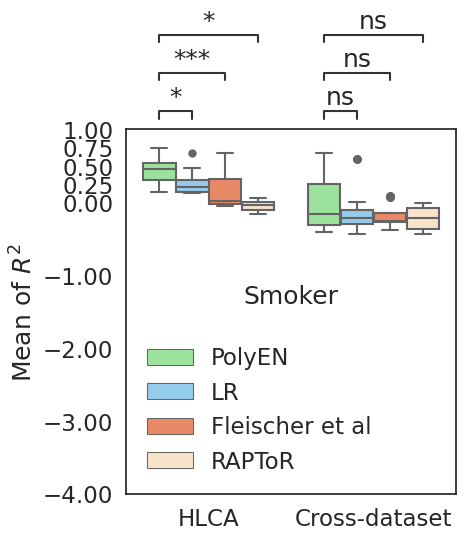

In [21]:
fig,ax = plt.subplots(nrows=1, ncols = 1, figsize = (5,6))
palette = {
          "PolyEN":"lightgreen",
          "LR":"lightskyblue",
          "Fleischer et al":"coral",
          "RAPToR":"bisque"
          }
sns.boxplot(data = smoker_plt,
            x = "group",
            y = "R2_mean",
            hue = "method",
            hue_order = ["PolyEN","LR","Fleischer et al","RAPToR"],
            palette = palette,
            flierprops={"marker": "o"},
            ax = ax)
ax.set_ylim((-4, 1))
ax.set_yticks([-4,-3,-2,-1,0,0.25,0.5,0.75,1])
ax.set_ylabel("Mean of $R^2$")
ax.set_xlabel("")
ax.get_legend().remove()
ax.set_title("Smoker", x=0.5, y=0.5)
ax.legend(frameon=False)
res = add_stat_annotation(ax, data=smoker_plt, x="group", y="R2_mean", hue = "method",
                                   box_pairs=[(("HLCA", "PolyEN"), ("HLCA", "LR")),
                                              (("HLCA", "PolyEN"), ("HLCA", "Fleischer et al")),
                                              (("HLCA", "PolyEN"), ("HLCA", "RAPToR")),
                                              (("Cross-dataset", "PolyEN"), ("Cross-dataset", "LR")),
                                              (("Cross-dataset", "PolyEN"), ("Cross-dataset", "Fleischer et al")),
                                              (("Cross-dataset", "PolyEN"), ("Cross-dataset", "RAPToR")),
                                             ],
                                   test='Mann-Whitney', text_format='star',
                                   comparisons_correction=None, 
                                   loc='outside', verbose=2)
plt.tight_layout()
if not os.path.isdir("results/figs"):
    os.mkdir("results/figs")
fig.savefig("results/figs/method_comparison_smoker_fig2c1.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cross-dataset_PolyEN v.s. Cross-dataset_LR: Mann-Whitney-Wilcoxon test two-sided, P_val=5.716e-07 U_stat=1.975e+03
HLCA_PolyEN v.s. HLCA_LR: Mann-Whitney-Wilcoxon test two-sided, P_val=3.108e-02 U_stat=7.900e+01
Nuc-seq_PolyEN v.s. Nuc-seq_LR: Mann-Whitney-Wilcoxon test two-sided, P_val=5.828e-04 U_stat=9.600e+01
HLCA_PolyEN v.s. HLCA_RAPToR: Mann-Whitney-Wilcoxon test two-sided, P_val=3.108e-02 U_stat=7.900e+01
Cross-dataset_PolyEN v.s. Cross-dataset_RAPToR: Mann-Whitney-Wilcoxon test two-sided, P_val=4.987e-09 U_stat=7.500e+02
Nuc-seq_PolyEN v.s. Nuc-seq_RAPToR: Mann-Whitney-Wilcoxon test two-sided, P_val=1.827e-04 U_stat=1.000e+02
Cross-dataset_PolyEN v.s. Cross-dataset_Fleischer et al: Mann-Whitney-Wilcoxon test two-sided, P_val=2.200e-24 U_stat=9.200e+03
HLCA_PolyEN v.s. HLCA_Fleischer et al: Mann-Whitney-Wilcoxon test 

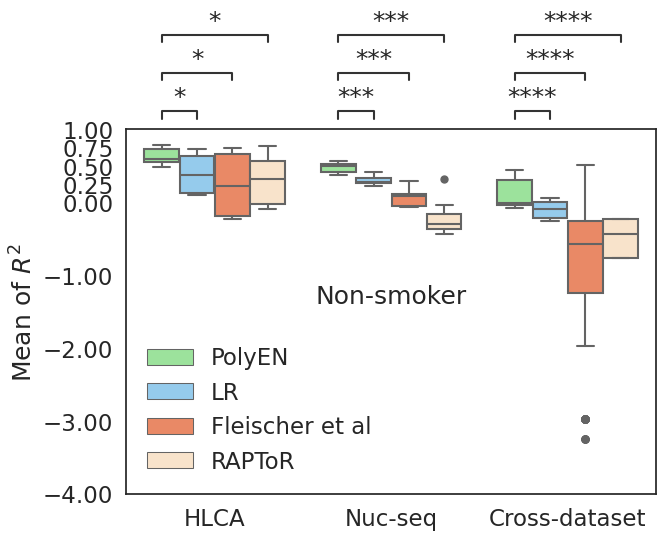

In [22]:
fig,ax = plt.subplots(nrows=1, ncols = 1, figsize = (7,6))
palette = {
          "PolyEN":"lightgreen",
          "LR":"lightskyblue",
          "Fleischer et al":"coral",
          "RAPToR":"bisque"
          }
sns.boxplot(data = nonsmoker_plt,
            x = "group",
            y = "R2_mean",
            hue = "method",
            hue_order = ["PolyEN","LR","Fleischer et al","RAPToR"],
            palette = palette,
            flierprops={"marker": "o"},
            ax = ax)
ax.set_ylim((-4, 1))
ax.set_yticks([-4,-3,-2,-1,0,0.25,0.5,0.75,1])
ax.set_ylabel("Mean of $R^2$")
ax.set_xlabel("")
ax.get_legend().remove()
ax.set_title("Non-smoker", x=0.5, y=0.5)
ax.legend(frameon=False)
res = add_stat_annotation(ax, data=nonsmoker_plt, x="group", y="R2_mean", hue = "method",
                                   box_pairs=[(("HLCA", "PolyEN"), ("HLCA", "LR")),
                                              (("HLCA", "PolyEN"), ("HLCA", "Fleischer et al")),
                                              (("HLCA", "PolyEN"), ("HLCA", "RAPToR")),
                                              (("Cross-dataset", "PolyEN"), ("Cross-dataset", "LR")),
                                              (("Cross-dataset", "PolyEN"), ("Cross-dataset", "Fleischer et al")),
                                              (("Cross-dataset", "PolyEN"), ("Cross-dataset", "RAPToR")),
                                              (("Nuc-seq", "PolyEN"), ("Nuc-seq", "LR")),
                                              (("Nuc-seq", "PolyEN"), ("Nuc-seq", "Fleischer et al")),
                                              (("Nuc-seq", "PolyEN"), ("Nuc-seq", "RAPToR"))
                                             ],
                                   test='Mann-Whitney', text_format='star',
                                   comparisons_correction=None, 
                                   loc='outside', verbose=2)
plt.tight_layout()
if not os.path.isdir("results/figs"):
    os.mkdir("results/figs")
fig.savefig("results/figs/method_comparison_nonsmoker_fig2c2.svg")